# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape
print('There are',df.shape[0],'rows and',df.shape[1],'columns in the data set')

There are 1898 rows and 9 columns in the data set


#### Observations:
There are 1898 rows and 9 columns in the data set.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are currently 4 columns with integer data types.
There are 4 columns with object types
There is 1 column with float type
I observe that the columns for order id and customer id are seen as integers, but since they are only for identification, they should be converted to object type.
I observe that the rating column is seen as an object, which is strange as it is made up of numbers. I will need to check out the unique values and make changes where necessary.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
#Checking all the unique values in 'rating"
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [7]:
#replacing the 'Not_given values' with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)

In [8]:
#converting the data type to a float
df['rating']=df['rating'].astype(float)

In [9]:
# also converting customer_id and order_id to object type since they are just for identification
df[['customer_id','order_id']]=df[['customer_id','order_id']].astype(object)

In [10]:
#Checking for any duplicated data in the dataset.
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


#### Observations:
There are now null values in the data set from the rating column. The value 'Not given' has been replaced with nan. I have intentionally not replaced it with zero, as that could easily be confusing as the order was not rated 0, it was rather not given any rating which could be for numerous reasons.
The data types of order id and customer id have been changed since they are identifiers
there are no duplicates in the dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
#decribing teh whole data set
df.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1162.000000,1898.000000,1898.000000
mean,16.498851,4.344234,27.371970,24.161749
std,7.483812,0.741478,4.632481,4.972637
min,4.470000,3.000000,20.000000,15.000000
25%,12.080000,4.000000,23.000000,20.000000
50%,14.140000,5.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


In [13]:
#describing only the data set with the food_preparation time
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
The average time for food preparation is 27.37 ,minutes. the minimum time is 20 minutes and the maxiimum time is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [14]:
#since the 'not_given' values have now been converted to nan, we can find out how many orders are not rated by checking all the null values in the rating column
df['rating'].isnull().sum()

736

#### Observations:
since the "not given" values have been replaced with nan, i have counted the number of nan values. 
There are 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

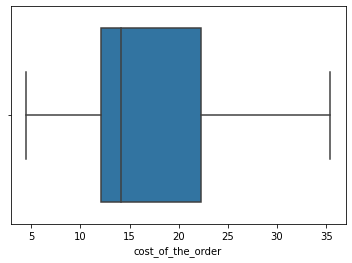

In [15]:
sns.boxplot(data=df,x='cost_of_the_order');

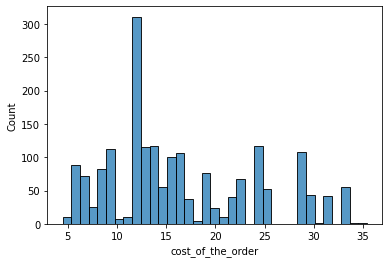

In [16]:
sns.histplot(data=df,x='cost_of_the_order', bins=35);

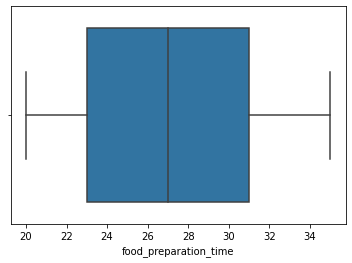

In [17]:
sns.boxplot(data=df,x='food_preparation_time');

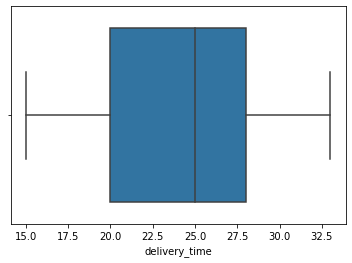

In [18]:
sns.boxplot(data=df,x='delivery_time');

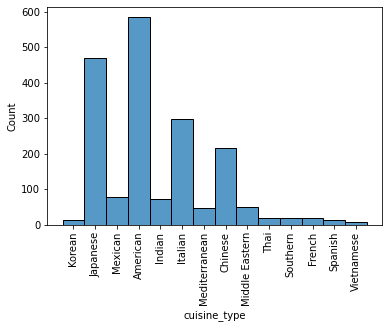

In [19]:
sns.histplot(data=df,x='cuisine_type');
plt.xticks(rotation=90);

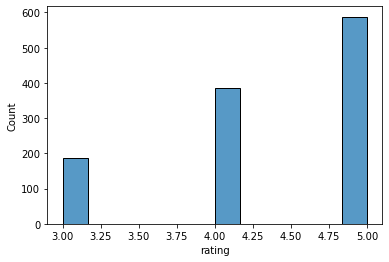

In [20]:
sns.histplot(data=df,x='rating');

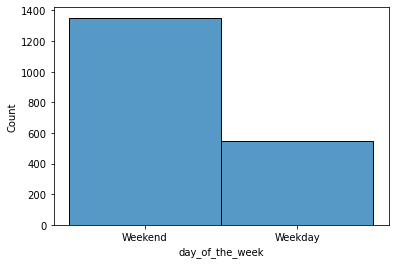

In [21]:
sns.histplot(data=df,x='day_of_the_week');

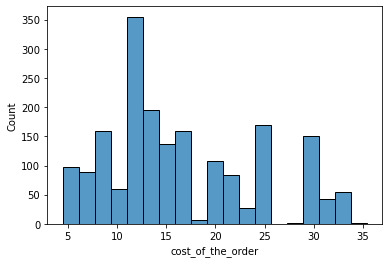

In [22]:
sns.histplot(data=df,x='cost_of_the_order');

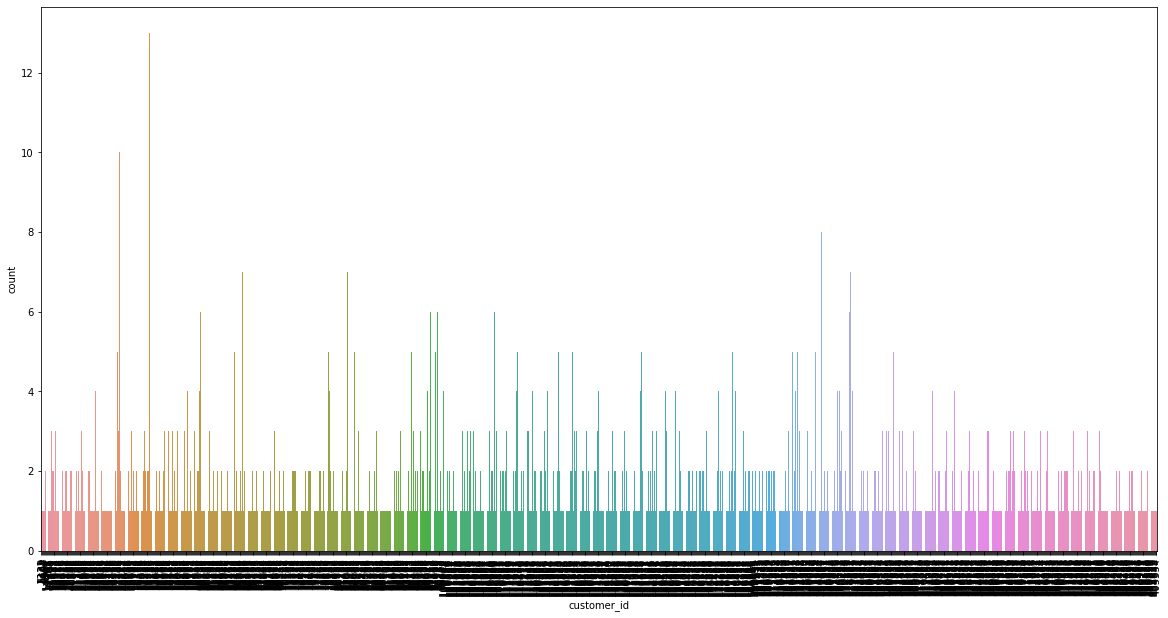

In [23]:
plt.figure(figsize=(20,10));
sns.countplot(data=df,x='customer_id');
plt.xticks(rotation=90);

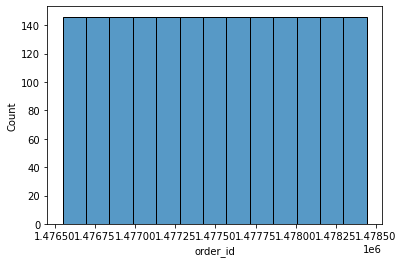

In [24]:
sns.histplot(data=df,x='order_id');

### observations:
Cost of the order: Most of the orders cost between 12-22 dollars. The minimum one needs to order a meal is about 4 dollars and the maximum is 35 dollars.There are no outliers in the data set.
The histogram shows that meals that cost 13 dollars for the total order were the most ordered. 

Delivery_time; 75% of the orders are delivered within 28minutes after food preparation was completed.

cuisine_type: American cuisine is the most ordered type of food while vietnamese is the least ordered. The top 5 most ordered cuisine types are American, Japanese, Italian, Chinese and Mexican cuisine.

Rating: 38% of the orders have ratings that are not given. this is significant and the column will be dropped in furture. However, of all the orders that are actually rated, the most common rating is 5.0 and the lowest 3.0.

Day of the week: There are more orders during the weekend than on weekdays
customer id: plotting for this is not a great idea as there are very many different id's. however, we can vaguely see the order counts among the different customers.

order id: No suggestions,insights or comments on this plot, as it is just for identification and not to be analyzed.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
print(df['restaurant_name'].value_counts(ascending=False).head())

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
df[['order_id','cuisine_type','day_of_the_week']][df['day_of_the_week']=='Weekend'].groupby('cuisine_type').count().sort_values(by='order_id',ascending=False).head()

,order_id,day_of_the_week
cuisine_type,,
American,415,415
Japanese,335,335
Italian,207,207
Chinese,163,163
Mexican,53,53


#### Observations:
American cuisine is mostly ordered during the weekend.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
#first, i am locating all orders that cost more than 20 dollars
df.loc[df['cost_of_the_order']>20].count()

order_id                 555
customer_id              555
restaurant_name          555
cuisine_type             555
cost_of_the_order        555
day_of_the_week          555
rating                   356
food_preparation_time    555
delivery_time            555
dtype: int64

In [28]:
# i am taking the total count of orders that are more than 20 dollars and dividing it by the total number of values in the column which is 1898 in order to get the percentage
orders_more_than_20=555/1898 *100
print(orders_more_than_20)

29.24130663856691


#### Observations:
29.2% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [29]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
the mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [30]:
#i am separating the data first into 3 columns as a new dataframe and then using the groupby function to group the adjusted data frame by the customer id. 
#Then i count the values and sort the values by their order id in descending order.
df[['customer_id','order_id','restaurant_name']].groupby('customer_id').count().sort_values(by='order_id',ascending=False).head()

,order_id,restaurant_name
customer_id,,
52832,13,13
47440,10,10
83287,9,9
250494,8,8
65009,7,7


#### Observations:
The customers with the highest number of orders are: 
customer 52832
customer 47440
customer 83487
customer 250494
customer 65009


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [31]:
#i am creating a new column called Total order time, which is the total time it takes from order placement to order completion.
#It will help us to understand the data much better.
df['Total_order_time']=df['delivery_time']+df['food_preparation_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_order_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


#### Observation
The total order time helps us to see how or if the delivery time and order preparation time affect each other.

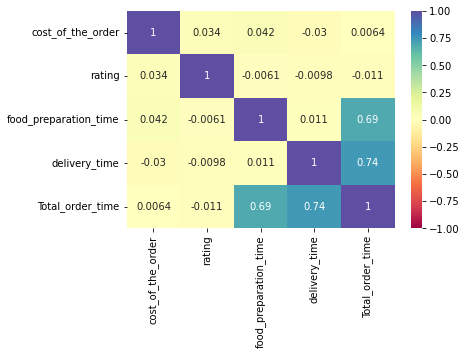

In [32]:
 sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

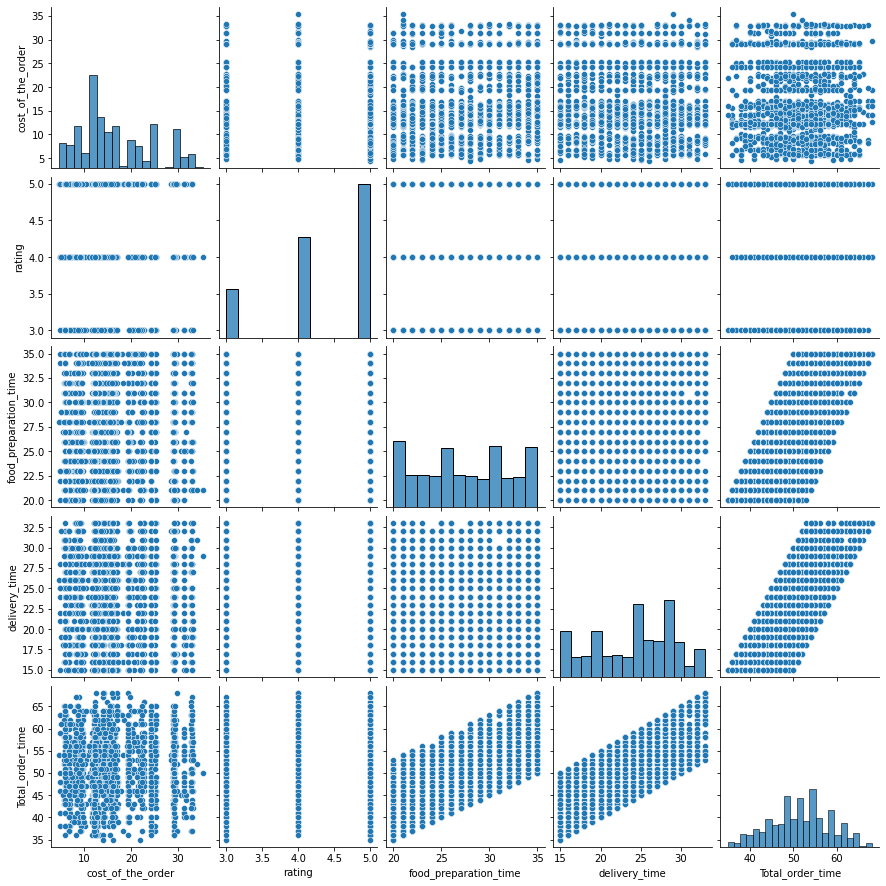

In [33]:
sns.pairplot(data=df[['cost_of_the_order','rating','food_preparation_time','delivery_time','Total_order_time']]);

#### Observation
From the heat map and pairplot, we see a strong positive correlation between delivery time and total time, as well as order preparation time and total time. as the order preparation time increases, the total time increases. likewise, as the delivery time increases, the total time increases.

We also see that there is no correlation between most of the other columns in the data frame. we can observe very little positive and negative correlations. The cost of the order has no correlation with the rating. This may however be due to the 736 null ratings in the data set. we could drop the rows that have missing ratings and recheck, but that will mean dropping 36% of the whole data set. There are no correlations observed within the other columns.



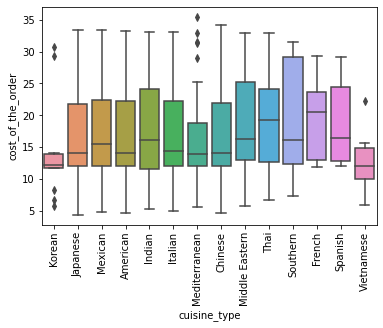

In [34]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order');
plt.xticks(rotation=90);

#### Observation
Vietnamese cuisine has the lowest prices overall but for one outlier. the highest cost of order is from the mediterranean cuisine. the Korean cuisine has a few outliers on both extremes. 

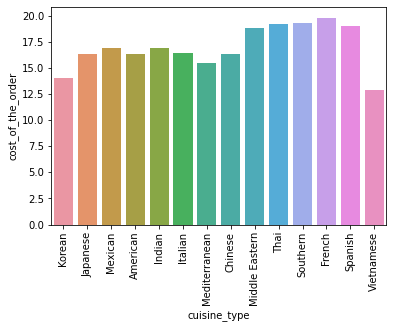

In [35]:
sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order',ci=False);
plt.xticks(rotation=90);

#### Observation
Vietnamese cuisine has the lowest prices overall. The most expensive cuisine on average is the french cuisine. The cuisine with the top 5 orders have similar costs of order.the most expensive cuisines are in the bottom on the list of frequently ordered cuisines.

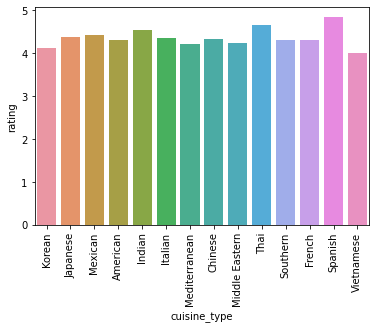

In [36]:
sns.barplot(data=df, x='cuisine_type', y='rating',ci=False);
plt.xticks(rotation=90);

Spanish cuisine is rated the highest. it seems the rating and total order times may not have much effect on the sales count as the sales count is still rather low,(bottom 5) though the rating is high.
it however has the highest average rating of 5.

Although vietnamese cuisine averagely costs the lowest, it still has the least number of orders. it also has the lowest average ratings and one of the highest total order times.

The top 5 most ordered quisine don't necessarily show the best rating.

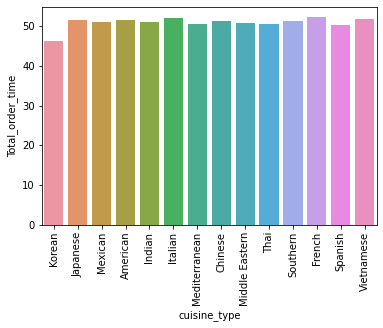

In [37]:
sns.barplot(data=df, x='cuisine_type', y='Total_order_time',ci=False);
plt.xticks(rotation=90);

#### Observation
Korean cuisines takes the shortest time from time of order placement to fulfilment. however, it is in the bottom 5 ehrn it comes to the number of orders.
The top 5 most frequently ordered cuisine types have similar total order times which are around the average for the whole data set.



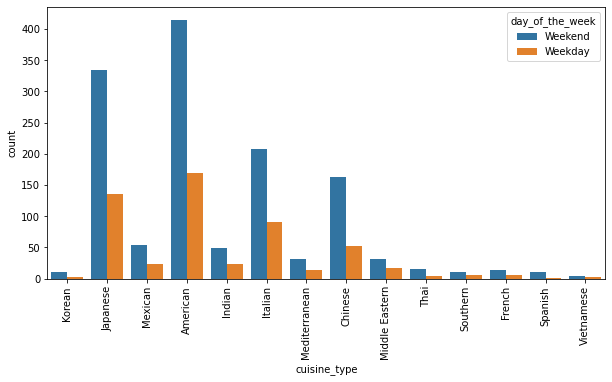

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine_type',hue='day_of_the_week');
plt.xticks(rotation=90);

#### Observation
For all cuisine types, food is ordered mostly on the weekends compared to weekdays
during the weekends, restaurants receive about twice the number of food ordered during the week for the given cuisine types.

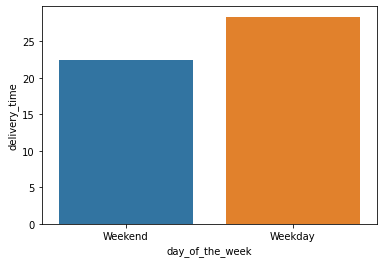

In [39]:
sns.barplot(data=df, x='day_of_the_week', y='delivery_time',ci=False);

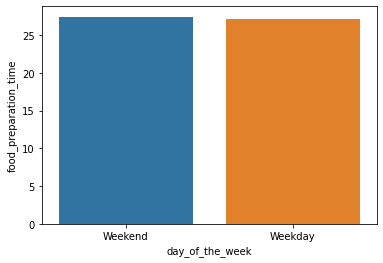

In [40]:
sns.barplot(data=df, x='day_of_the_week', y='food_preparation_time',ci=False);

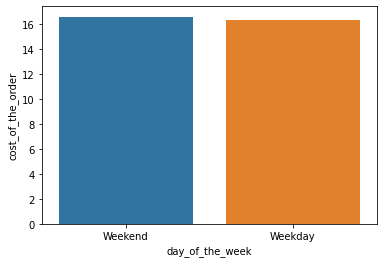

In [41]:
sns.barplot(data=df, x='day_of_the_week', y='cost_of_the_order',ci=False);

In [42]:
#I need to understand the distribution of the rating and how many customers rated each cusine. to do this, i have to group by cusine type and then count.
cuisine = df.groupby('cuisine_type')[['rating']].agg(['mean','count','std','sum'])
cuisine

rating                        
                    mean count       std     sum
cuisine_type                                    
American        4.298913   368  0.747602  1582.0
Chinese         4.338346   133  0.767594   577.0
French          4.300000    10  0.823273    43.0
Indian          4.540000    50  0.676425   227.0
Italian         4.360465   172  0.747906   750.0
Japanese        4.373626   273  0.727329  1194.0
Korean          4.111111     9  0.781736    37.0
Mediterranean   4.218750    32  0.870090   135.0
Mexican         4.416667    48  0.709610   212.0
Middle Eastern  4.235294    34  0.698866   144.0
Southern        4.307692    13  0.630425    56.0
Spanish         4.833333     6  0.408248    29.0
Thai            4.666667     9  0.500000    42.0
Vietnamese      4.000000     5  1.000000    20.0

#### Observation
Typically, orders take longer to fulfil on the weekdays, as opposed to weekends.
The bar plots above show that the order preparation time is relatively the same on both weekends and weekdays, but the delTypically, orders take longer to fulfil on the weekdays, as opposed to weekends. The bar plots above show that the order preparation time is relatively the same on both weekends and weekdays, but the delivery time is averagely longer during the weekdays, affecting the total order time. the cost of orders during the weekend and weekdays are relatively the sameivery time is averagely longer during the weekdays, affecting the total order time.
the cost of orders during the weekend and weekdays are relatively the same

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [43]:
rest= df.groupby('restaurant_name')[['rating']].agg(['mean','sum','count','std'])
rest.columns = rest.columns.droplevel(0)
# I am dropping the level (0) to remove the rating which is the parent column to the aggregate functions to be able to access the aggregated columns better.

In [44]:
rest= rest[(rest['mean']>4) & (rest['count']>50)]
rest
#i am restricting the outcome based on mean and count.

,mean,sum,count,std
restaurant_name,,,,
Blue Ribbon Fried Chicken,4.328125,277.0,64,0.757076
Blue Ribbon Sushi,4.219178,308.0,73,0.786105
Shake Shack,4.278195,569.0,133,0.742165
The Meatball Shop,4.511905,379.0,84,0.702732


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [45]:
#Isolating the items with cost greater than 20
df6 = df[df['cost_of_the_order'] >20].copy()
#I am creating a new column to compute the revenue for this data frame
df6['revenue']=df6['cost_of_the_order']*0.25
df6


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_order_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45,7.6875
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40,7.3000
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24,44,6.3050
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17,40,6.0750
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,NaN,21,22,43,8.2575
...,...,...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3.0,31,24,55,7.8575
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4.0,27,29,56,7.2625
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21,50,7.2875
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17,48,5.5775


In [46]:
#aggregate the revenue
df7=df6[['revenue']].agg(['mean','sum','count','std'])
df70=df7.T
df70

,mean,sum,count,std
revenue,6.646356,3688.7275,555.0,0.962837


In [47]:
df8=df
df8[(df8['cost_of_the_order']>5) & (df8['cost_of_the_order']<20)]
df8 = df[(df['cost_of_the_order'] >5) & (df['cost_of_the_order'] <=20)].copy()


In [48]:
df8['revenue']=df8['cost_of_the_order']*0.15
df8=df8[['revenue']].agg(['mean','sum','count','std'])
df9=df8.T

In [49]:
df9

,mean,sum,count,std
revenue,1.857253,2477.5755,1334.0,0.546718


In [50]:
df9['sum']

revenue    2477.5755
Name: sum, dtype: float64

In [51]:
df9['sum']+df70['sum']

revenue    6166.303
Name: sum, dtype: float64

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
df[['order_id','Total_order_time','cuisine_type']][df['Total_order_time']>60]


,order_id,Total_order_time,cuisine_type
7,1477859,63,Mediterranean
10,1477895,62,Chinese
19,1477354,61,Japanese
24,1476714,61,Middle Eastern
54,1477760,64,Mediterranean
...,...,...,...
1869,1476923,61,American
1873,1478148,63,American
1875,1478039,65,Southern
1880,1477466,62,American


In [53]:
Totalobs=df['Total_order_time'].count()
T60=df['Total_order_time'][df['Total_order_time']>60].count()
round((T60/Totalobs)*100,2)

10.54

In [54]:
#df1=df[['order_id','Total_order_time','cuisine_type']]
#df2=[df1['Total_order_time']>60
#df3=df2(groupby('order_id').count())
    # df[['order_id','Total_order_time','cuisine_type']][df['Total_order_time']>60.groupby('order_id').count().value_counts(normalize=True).head()

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [55]:
#First, i am separating the 2 delivery times: weekday and weekend.
df[['order_id','delivery_time','day_of_the_week']][df['day_of_the_week']=='Weekend'].groupby('order_id').sum().mean()

delivery_time    22.470022
dtype: float64

In [56]:
df[['order_id','delivery_time','day_of_the_week']][df['day_of_the_week']=='Weekday'].groupby('order_id').sum().mean()

delivery_time    28.340037
dtype: float64

#### Observations:
The delivery time during the week is averagely higher than delivery time during the weekend. This may be due to increased traffic during the week, or poor driver management,poor attitude of the driver.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*  Most of the orders cost between 12-22 dollars.

*  American cuisine is the most ordered type of food while vietnamese is the least ordered. 

*  38% of the orders have ratings that are not given.Spanish cuisine is rated the highest and the top 5 most ordered quisine don't necessarily show the best rating.

*  There are more orders during the weekend than on weekdays and typically, orders take longer to fulfil on the weekdays, as opposed to weekends. The order preparation time is the same, but the delivery time is averagely longer during the weekdays, affecting the total order time.

*  There is a strong positive correlation between delivery time and total time, as well as order preparation time and total time. as the order preparation time increases, the total time increases. likewise, as the delivery time increases, the total time increases.

*  There is no correlation between most of the columns in the data frame. we can observe very little positive and negative correlations. 

*  Although vietnamese cuisine averagely costs the lowest, it still has the least number of orders. it also has the lowest average ratings and one of the highest total order times.






### Recommendations:

*  Ratings are very important for this business,but there are much lower count of ratings than desired. There could be many reasons for the customers decision not to rate the service, thus, I will suggest an incentive to make the customers want to rate the service once their order is complete. e.g giving a discount once an order is rates, or a free drink on the tenth rated order. It may be more beneficial if the customers rate the restaurant/food separately and the delivery service separately. That way, we can easily identify further areas of improvement. The customer may be displeased with the restaurants food but very happy with the delivery service provided by food hub. since food hub is a food aggregator company and not in control of the meal preparation, separate ratings may help them identify areas of improvement for their company and ratings for the food/restaurants will help them know which restaurant/cuisine type to drop from their service.
*  It may be a good idea to scrap Vietnamese cuisine as it has the lowest rating, lowest number of orders and one of the highest total delivery times. Though Vietnamese cusine is cheap, it seems not to interest the students and busy workers.It might be more beneficial to focus a bit more on the cuisines with much higher order counts and cuisine types that can be quickly improved upon.
*  I will also recommend a weekday promo of some sort to boost sales during the weekdays. It could be something that encourages the customers like giving a discount or free delivery on orders of certain amount during the weekdays to encourage them to place their orders. 
*  Also, delivery time is much longer during weekdays. This may be due to traffic during the week or maybe slowness of the delivery driver. The company can look into employing more delivery personnel and probably grouping them per region so that they cover each location faster.
* Incentives can also be introduced for delivery persons to encourage them to deliver the orders faster especially during the week. Eg, the app can take note of drivers that completes their deliveries within 20 minutes and they can get a bonus. 
*  The company can also engage more restaurants that serve the most frequently ordered cuisine: American, Japanese, Italian , Chinese and Mexican and enroll them for their service. On the other hand, they can reduce the number of restaurants that serve the least desired cuisines based on ratings and order counts: Vietnamese, French, Spanish, Korean and Thai.  

---